## Insurance Premium Prediction

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

In [2]:
# Import the dataset
df=pd.read_csv("D:/downloads/insurance.csv")

In [3]:
data = df.copy()

In [4]:
# Top 5 rows from dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# last 5 rows from dataset
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# Shape of the dataset
df.shape

(1338, 7)

In [7]:
# Check the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Find null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
# We found no null values.

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [11]:
print(df['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [16]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

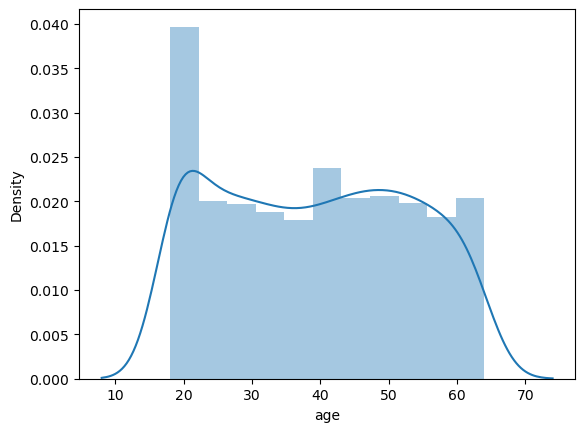

In [18]:
sns.distplot(df.age)

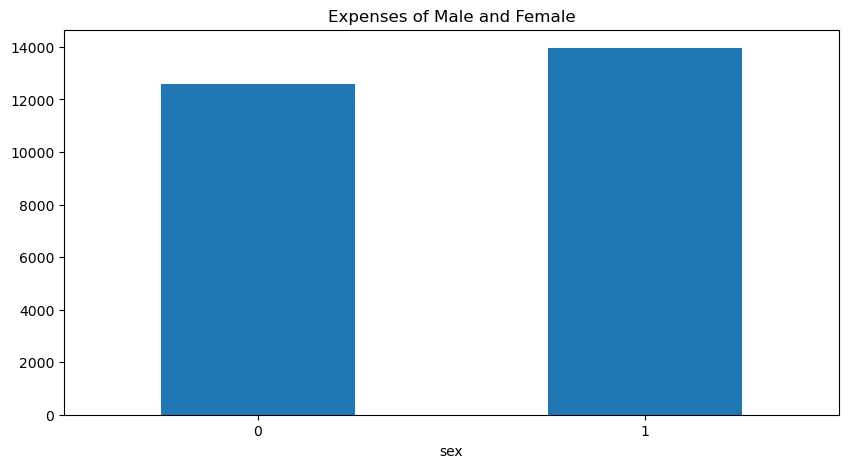

In [19]:
plt.figure(figsize=(10,5))
df.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel=('Medical Expense')
plt.title("Expenses of Male and Female")
plt.xticks(rotation = 0)
plt.show()

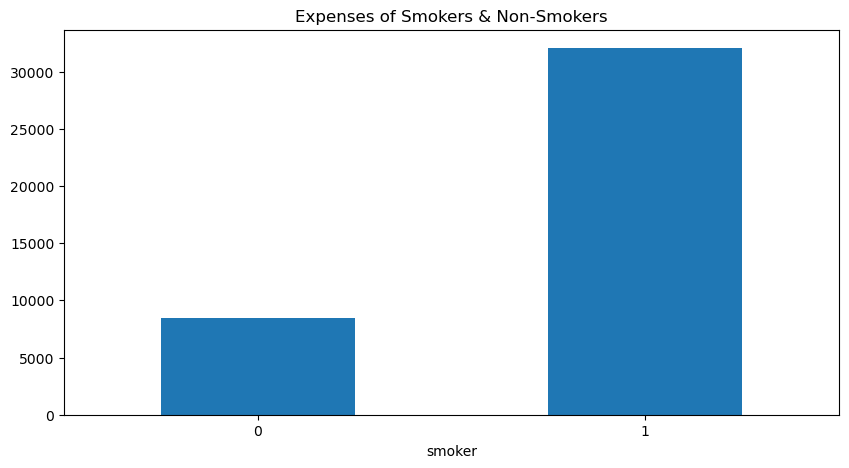

In [20]:
plt.figure(figsize=[10,5])
df.groupby(["smoker"])["expenses"].mean().plot.bar()
plt.ylabel=("Medical Expense")
plt.xticks(rotation=0)
plt.title("Expenses of Smokers & Non-Smokers")
plt.show()

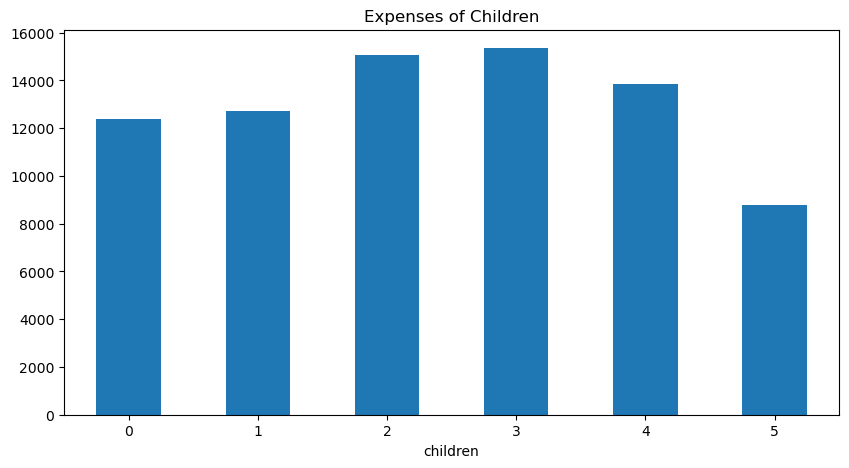

In [21]:
plt.figure(figsize=[10,5])
df.groupby(["children"])["expenses"].mean().plot.bar()
plt.ylabel=("Expense")
plt.xticks(rotation=0)
plt.title("Expenses of Children")
plt.show()

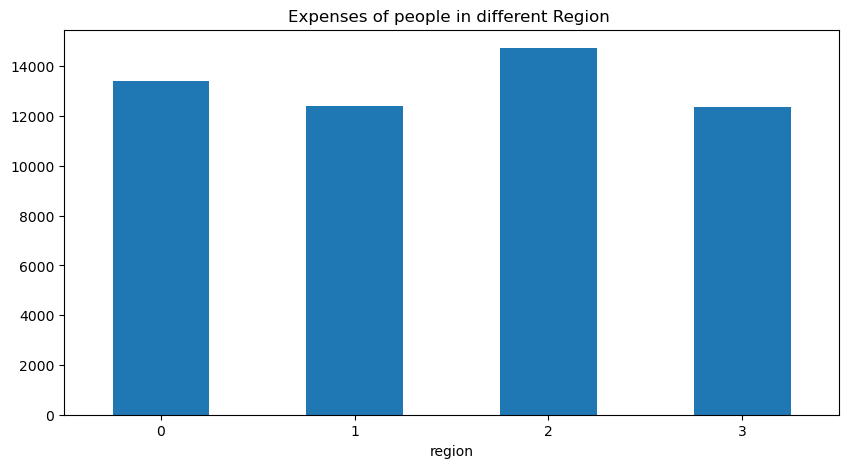

In [22]:
plt.figure(figsize=[10,5])
df.groupby(["region"])["expenses"].mean().plot.bar()
plt.ylabel=("Medical Expense")
plt.xticks(rotation=0)
plt.title("Expenses of people in different Region ")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

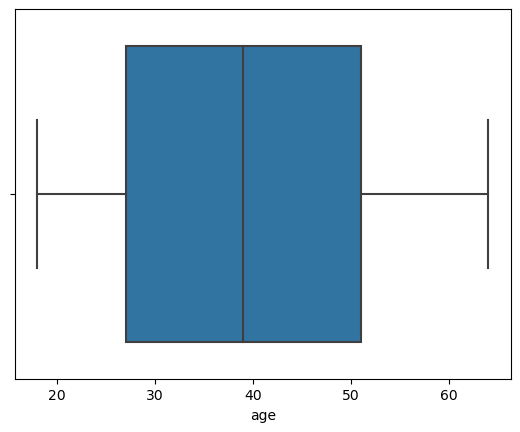

In [23]:
sns.boxplot(df.age)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

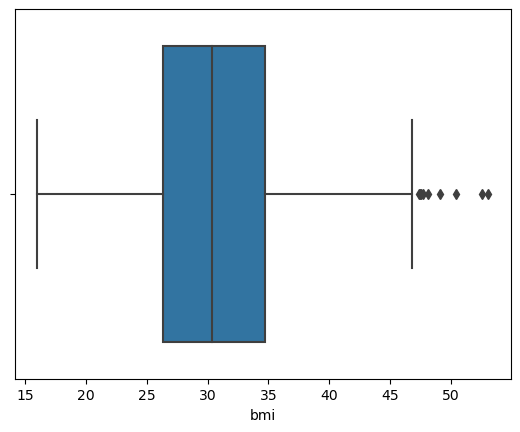

In [24]:
sns.boxplot(df.bmi)

## removing outliers

In [25]:
percentile25 = df['bmi'].quantile(0.25)
percentile75 = df['bmi'].quantile(0.75)
IQR = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [26]:
print(upper_limit)
print(lower_limit)

47.300000000000004
13.699999999999998


In [27]:
df['bmi'] = np.where(df['bmi'] > upper_limit, upper_limit, df['bmi']) 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

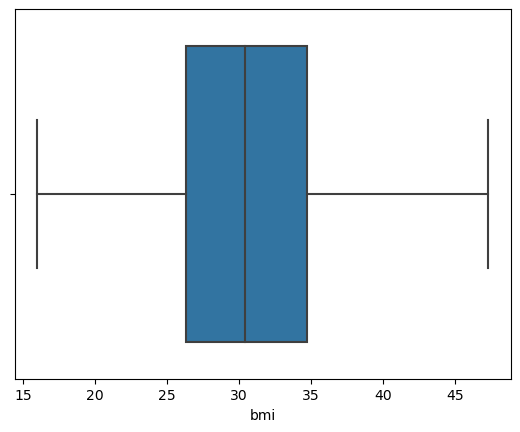

In [28]:
sns.boxplot(df.bmi)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

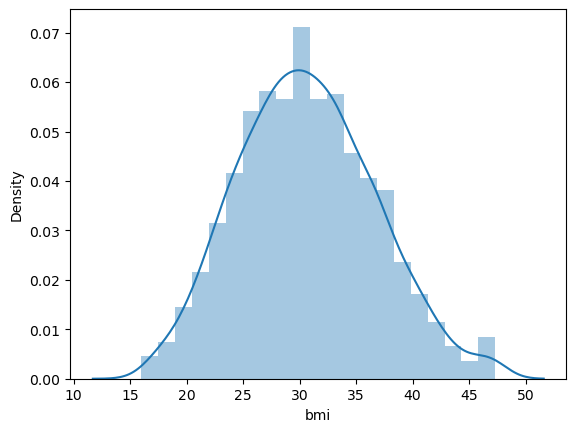

In [29]:
sns.distplot(df.bmi)

In [30]:
corr_matrix = df.corr()
corr_matrix['expenses'].sort_values(ascending=False)


expenses    1.000000
smoker      0.787251
age         0.299008
bmi         0.199233
children    0.067998
sex         0.057292
region     -0.006208
Name: expenses, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [32]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [33]:
x = scale.fit_transform(x)

In [34]:
x

array([[-1.43876426, -1.0105187 , -0.45452662, -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.51987161, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38774982,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.03184356, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.80134633, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.25634393, -0.90861367,  1.97058663,
        -0.46691549]])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.39,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=ml.predict(x_test)

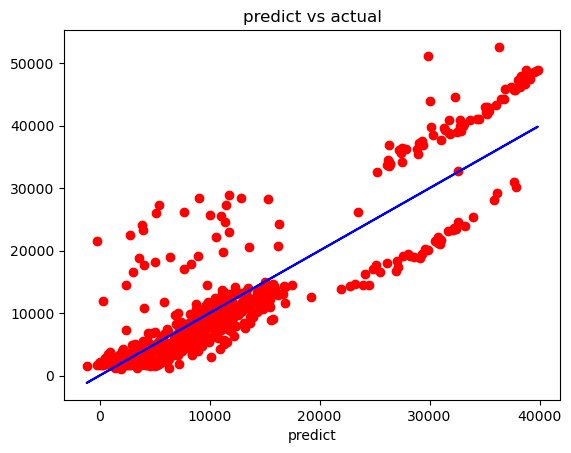

In [38]:
plt.scatter(y_pred, y_test, color = 'red')
plt.plot(y_pred, ml.predict(x_test), color = 'blue')

plt.title('predict vs actual')
plt.xlabel('predict')
plt.show()

In [39]:
model_list = []
mean_absolute_error_list = []
mean_squared_error_list = []
root_mean_sqared_error_list = []
R2_score = []
from sklearn import metrics


In [40]:
def Model_features(x_train , y_train , x_test , y_test , y_pred , model_name):

    mean_absolute_error ,mean_squared_error , root_mean_sqared_error , R2= round(metrics.mean_absolute_error(y_test , y_pred),ndigits=2), round(metrics.mean_squared_error(y_test,y_pred),ndigits=2) , round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),ndigits=2), round(metrics.r2_score(y_test,y_pred),ndigits=2)
    
    print(f'mean_absolute_error :{mean_absolute_error}')
    print(f'mean_squared_error :{mean_squared_error}')
    print(f'root_mean_sqared_error :{root_mean_sqared_error}')
    print(f'R2_score :{R2}')

    model_list.append(model_name)
    mean_absolute_error_list.append(mean_absolute_error)
    mean_squared_error_list.append(mean_squared_error)
    root_mean_sqared_error_list.append(root_mean_sqared_error)
    R2_score.append(R2)

In [41]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "LinearRegression" )

mean_absolute_error :4053.18
mean_squared_error :33232007.89
root_mean_sqared_error :5764.72
R2_score :0.79


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [43]:
knn = KNeighborsRegressor(n_neighbors=20,algorithm='ball_tree')
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

In [44]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "KNeighborsRegression" )


mean_absolute_error :3291.57
mean_squared_error :24070223.63
root_mean_sqared_error :4906.14
R2_score :0.85


In [45]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)

In [46]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "SVR" )


mean_absolute_error :8591.0
mean_squared_error :169135070.59
root_mean_sqared_error :13005.19
R2_score :-0.08


In [47]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [48]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "RandomForestRegresser" )


mean_absolute_error :2727.93
mean_squared_error :21882099.61
root_mean_sqared_error :4677.83
R2_score :0.86


In [49]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [50]:
Model_features(x_train , y_train , x_test , y_test , y_pred , "DecisionTreeRegressor" )


mean_absolute_error :3402.5
mean_squared_error :49179841.96
root_mean_sqared_error :7012.83
R2_score :0.69


In [51]:
dict = {'Model_name':model_list,'mean_absolute_error' :mean_absolute_error_list,'mean_squared_error' : mean_squared_error_list, 'root_mean_sqared_error' :root_mean_sqared_error_list, 'R2_score': R2_score}
model_selection = pd.DataFrame(dict).sort_values(ascending = True , by = 'root_mean_sqared_error')
model_selection

,Model_name,mean_absolute_error,mean_squared_error,root_mean_sqared_error,R2_score
3,RandomForestRegresser,2727.93,2.188210e+07,4677.83,0.86
1,KNeighborsRegression,3291.57,2.407022e+07,4906.14,0.85
0,LinearRegression,4053.18,3.323201e+07,5764.72,0.79
4,DecisionTreeRegressor,3402.50,4.917984e+07,7012.83,0.69
2,SVR,8591.00,1.691351e+08,13005.19,-0.08


# Hyperparametic tuning

In [52]:
regressor =  RandomForestRegressor(max_depth=8, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=30)

In [53]:
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=30)

In [54]:
y_pred = regressor.predict(x_test)

In [55]:
metrics.r2_score(y_test,y_pred)

0.8865526414443976

In [56]:
residuals=y_test-y_pred


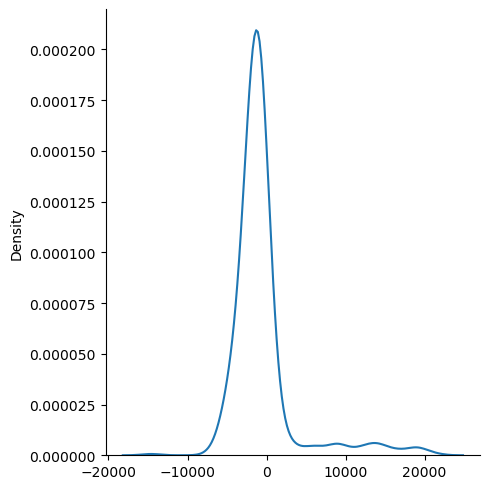

In [57]:
sns.displot(residuals,kind = 'kde')

# predict for new data

In [67]:
json_data = {
    "data":{
        "age":56,
        "sex":"male",
        "bmi":20,
        "children":0,
        "smoker":"yes",
        "region":"northeast"

    }
}

In [68]:
data = json_data['data']

In [69]:
data

{'age': 56,
 'sex': 'male',
 'bmi': 20,
 'children': 0,
 'smoker': 'yes',
 'region': 'northeast'}

In [70]:
new_data = pd.DataFrame([data])

In [71]:
new_data

,age,sex,bmi,children,smoker,region
0,56,male,20,0,yes,northeast


In [74]:
new_data = transform(new_data.loc[0])

In [75]:
pred_value = regressor.predict(scale.transform(pd.DataFrame(new_data).transpose()))

In [76]:
v= pd.DataFrame([pred_value])

In [77]:
round(v.loc[0,0],ndigits=2)

26151.15

In [78]:
round(np.float64(pred_value),ndigits=2)

26151.15

In [79]:
np.float64(pred_value)

26151.15382482724

In [82]:
json.loads(str(pred_value))


[26151.15382483]

In [83]:
json.dumps(str(pred_value))

'"[26151.15382483]"'

In [84]:
d = jsonify()

NameError: name 'jsonify' is not defined

In [86]:
transform(new_data)

KeyError: 1

In [ ]:
age=56
sex='male'
bmi=20
children=0
smoker='yes'
region='northeast'

In [ ]:
data = {"age":age,
        "sex":sex,
        "bmi":bmi,
        "children":children,
        "smoker":smoker,
        "region":region}

In [ ]:
data

In [ ]:
data = pd.DataFrame([data])

In [ ]:
data

In [73]:
def transform(new_data):
    
    sex={'male':1,'female':0}
    new_data.sex= sex[new_data.sex]
    smoker={'yes':1,'no':0}
    new_data.smoker= smoker[new_data.smoker]
    region={'northeast':0,'northwest':1,'southeast':2,'southwest':3}
    new_data.region= region[new_data.region]
    return new_data


In [ ]:
df.iloc[100,:-1]

In [ ]:
#real ammount
df.iloc[100,-1]

In [ ]:
#predicted amount
regressor.predict(scale.transform(pd.DataFrame(transform(new_data)).transpose()))

# Pickling for deployment

In [87]:
import pickle
pickle.dump(scale,open('scale.pkl','wb'))

In [88]:
transformdata = transform()

TypeError: transform() missing 1 required positional argument: 'new_data'

In [ ]:
transform

In [ ]:
pickle.dump(transformdata,open('transform.pkl','wb'))

In [ ]:
pickle.dump(regressor,open('regressor.pkl','wb'))

In [ ]:
pickle_transform = pickle.load(open('transform.pkl','rb'))

In [ ]:
pickle_transform(new_data)

In [ ]:
pickle_regress = pickle.load(open('regressor.pkl','rb'))

In [ ]:
pickle_regress.predict(scale.transform(pd.DataFrame(transform(new_data)).transpose()))

In [ ]:
def printdata(data):
    new_data = transform(data)
    return new_data

In [ ]:
printdata(new_data)